<h1>
    <center>
        <font color = blue >
            Credit EDA Case Study
        </font>    
            </center>
</h1>
<p style="text-align:right">
                           Submitted by Amrita Chatterjee and Padma A
</p>

<h2 style="font-family: Cambria>
    <font color = green>
       0. Import necessary libraries
    </font>  
</h2>    

<h2>
    <font color = green>
        0. Import data sources from CSV file
    </font>
</h2>    

### 0.1 Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

### 0.2 Suppressing Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 0.3 Adjusting viewing mode in Jupyter

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<h2>
    <font color = green>
        1. Import Data Sources from CSV files
    </font>
</h2> 


### 1.1 Importing the application_data csv file as applicationDF

In [4]:
applicationDF = pd.read_csv("application_data.csv")

### 1.2 Importing the previous_application csv file as previdousDF

In [172]:
previousDF= pd.read_csv("previous_application.csv")

<h2>
    <font color = green>
        2. Inspect the dataframes and respective columns for data understanding
    </font>
</h2> 


### 2.1 Inspect applicationDF Dataframe

In [ ]:
# Checking the top 5 rows of the dataframe
applicationDF.head()

In [ ]:
# checking botton 5 rows of the dataframe
applicationDF.tail()

In [ ]:
# Checking the shape of the dataframe
applicationDF.shape

In [ ]:
# Checking the size of the dataframe
applicationDF.size

#### Initial investigation of application_data dataframe by checking info() for Index, Datatype and Memory information

In [6]:
# checking the info about column type etc.
applicationDF.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [ ]:
# How many types of each data type column exists and total memory usage
applicationDF.info()

In [ ]:
# Checking the numerical columns data distribution
applicationDF.describe()

### 2.2 Inspect previousDF Dataframe

In [ ]:
# Checking the top 5 rows of the dataframe
previousDF.head()

In [ ]:
# checking botton 5 rows of the dataframe
previousDF.tail()

In [ ]:
# Checking the shape of the dataframe
previousDF.shape

In [ ]:
# Checking the size of the dataframe
previousDF.size

#### Initial investigation of previous_data dataframe by checking info() for Index, Datatype and Memory information

In [ ]:
# checking the info about column type etc.
previousDF.info(verbose = True)

In [ ]:
# How many types of each data type column exists and total memory usage
previousDF.info()

In [ ]:
# Checking the numerical columns data distribution
previousDF.describe()

<h2>
    <font color = green>
        3. Data Cleaning & Manipulation
    </font>
</h2> 


### 3.1 Column data type conversion

### Changing the column types of applicationDF dataframe

#### Numeric columns are already in int64 and float64 format. Hence proceeding with other columns.
3.1.1 Numeric column conversion from object to Numeric

In [ ]:
# # Converting the numeric values in applicationDF dataframe
# numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
#                 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
#        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

# applicationDF[numeric_columns]=applicationDF[numeric_columns].apply(pd.to_numeric)


In [ ]:
# # checking the dataframe after conversion
# applicationDF.info(verbose=True)

#### 3.1.2 Converting Y/N flag columns to 1/0 int64 format

In [6]:
Flag_col_application =['FLAG_OWN_CAR','FLAG_OWN_REALTY']

for col in Flag_col_application:
    applicationDF[col].replace(('Y', 'N'), (1, 0), inplace=True)


In [7]:
applicationDF['EMERGENCYSTATE_MODE'].replace(("Yes","No"),(1,0),inplace=True)

In [8]:
# rechecking the dataframe after column conversion
applicationDF.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  int64  
 5   FLAG_OWN_REALTY               int64  
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

#### 3.1.3 Date column conversion from object to Categorical column

In [9]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                  'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE',
                  'HOUSETYPE_MODE','FONDKAPREMONT_MODE','WALLSMATERIAL_MODE']
for col in categorical_columns:
    applicationDF[col] =pd.Categorical(applicationDF[col])

In [10]:
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: category(13), float64(66), int64(43)
memory usage: 259.5 MB



### Changing the column types of previousDF dataframe


#### 3.1.4 converting Yes/No or Y/N columns to 1/0 format

In [173]:
Flag_col_previous =['FLAG_LAST_APPL_PER_CONTRACT']
previousDF['FLAG_LAST_APPL_PER_CONTRACT'].replace(('Y', 'N'), (1, 0), inplace=True)

#### 3.1.5 converting Catgoerical columns from object to categorical

In [174]:
Catgorical_col_p = ['WEEKDAY_APPR_PROCESS_START','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_TYPE_SUITE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

for col in Catgorical_col_p:
    previousDF[col] =pd.Categorical(previousDF[col])

In [175]:
# inspecting the column types after conversion
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  object  
 3   AMT_ANNUITY                  1297979 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_DOWN_PAYMENT             774370 non-null   float64 
 7   AMT_GOODS_PRICE              1284699 non-null  float64 
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  category
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  int64   
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 12  RATE_DOWN_PAYMENT           

### 3.2 Null Value calculation

#### 3.2.1 Null value analysis for applicationDF dataframe

In [14]:
# Checking the null value % of each column in applicationDF dataframe
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

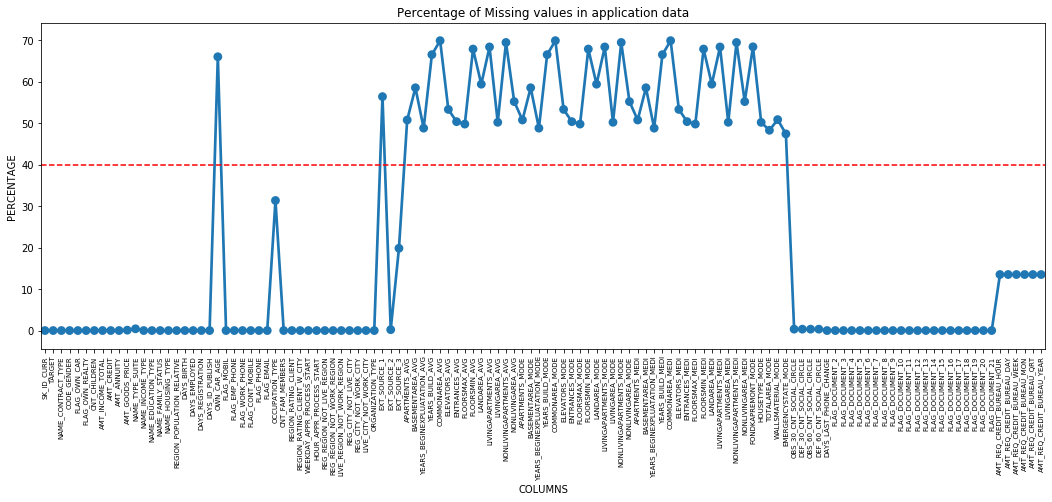

In [15]:
# plotting the null value % in a line graph for visualizing. 
# Set a limit of 40% target line to check which columns have more than 40% unknown values
fig = plt.figure(figsize=(18,6))
null_applicationDF = pd.DataFrame((applicationDF.isnull().sum())*100/applicationDF.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_applicationDF)
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [16]:
# more than or equal to 40% empty rows columns
nullcol_40_application = null_applicationDF[null_applicationDF[0]>=40]
nullcol_40_application

index          0
21                   OWN_CAR_AGE  65.990810
41                  EXT_SOURCE_1  56.381073
44                APARTMENTS_AVG  50.749729
45              BASEMENTAREA_AVG  58.515956
46   YEARS_BEGINEXPLUATATION_AVG  48.781019
47               YEARS_BUILD_AVG  66.497784
48                COMMONAREA_AVG  69.872297
49                 ELEVATORS_AVG  53.295980
50                 ENTRANCES_AVG  50.348768
51                 FLOORSMAX_AVG  49.760822
52                 FLOORSMIN_AVG  67.848630
53                  LANDAREA_AVG  59.376738
54          LIVINGAPARTMENTS_AVG  68.354953
55                LIVINGAREA_AVG  50.193326
56       NONLIVINGAPARTMENTS_AVG  69.432963
57             NONLIVINGAREA_AVG  55.179164
58               APARTMENTS_MODE  50.749729
59             BASEMENTAREA_MODE  58.515956
60  YEARS_BEGINEXPLUATATION_MODE  48.781019
61              YEARS_BUILD_MODE  66.497784
62               COMMONAREA_MODE  69.872297
63                ELEVATORS_MODE  53.295980
64                ENTRANCES_MODE  50.348768
65                FLOORSMAX_MODE  49.760822
66                FLOORSMIN_MODE  67.848630
67                 LANDAREA_MODE  59.376738
68         LIVINGAPARTMENTS_MODE  68.354953
69               LIVINGAREA_MODE  50.193326
70      NONLIVINGAPARTMENTS_MODE  69.432963
71            NONLIVINGAREA_MODE  55.179164
72               APARTMENTS_MEDI  50.749729
73             BASEMENTAREA_MEDI  58.515956
74  YEARS_BEGINEXPLUATATION_MEDI  48.781019
75              YEARS_BUILD_MEDI  66.497784
76               COMMONAREA_MEDI  69.872297
77                ELEVATORS_MEDI  53.295980
78                ENTRANCES_MEDI  50.348768
79                FLOORSMAX_MEDI  49.760822
80                FLOORSMIN_MEDI  67.848630
81                 LANDAREA_MEDI  59.376738
82         LIVINGAPARTMENTS_MEDI  68.354953
83               LIVINGAREA_MEDI  50.193326
84      NONLIVINGAPARTMENTS_MEDI  69.432963
85            NONLIVINGAREA_MEDI  55.179164
86            FONDKAPREMONT_MODE  68.386172
87                HOUSETYPE_MODE  50.176091
88                TOTALAREA_MODE  48.268517
89            WALLSMATERIAL_MODE  50.840783
90           EMERGENCYSTATE_MODE  47.398304

In [17]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_application)

49

#### 3.2.2 Null value analysis for previousDF dataframe

In [176]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

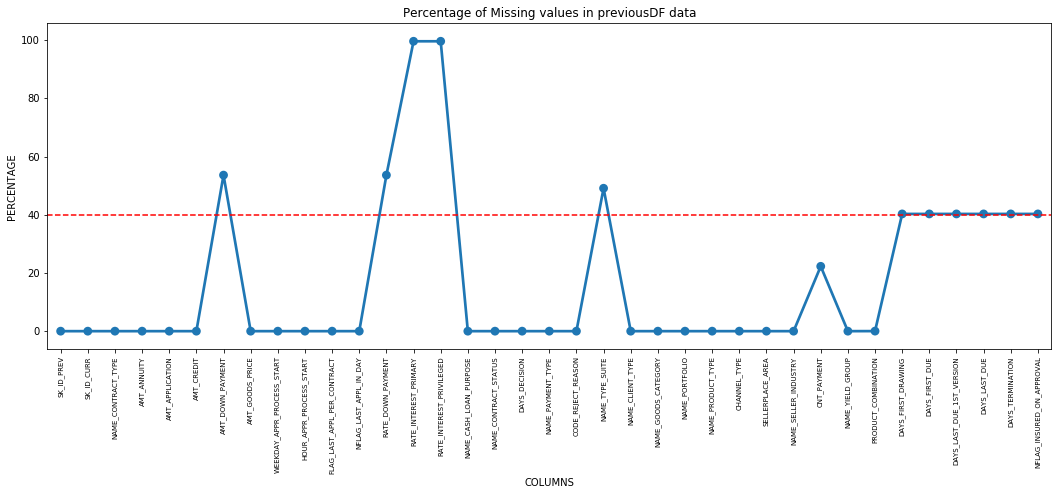

In [181]:
# plotting the null value % in a line graph for visualizing. 
# Set a limit of 40% target line to check which columns have more than 40% unknown values
fig = plt.figure(figsize=(18,6))
null_previousDF = pd.DataFrame((previousDF.isnull().sum())*100/previousDF.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_previousDF)
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in previousDF data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [182]:
# more than or equal to 40% empty rows columns
nullcol_40_previous = null_previousDF[null_previousDF[0]>=40]
nullcol_40_previous

index          0
6            AMT_DOWN_PAYMENT  53.636480
12          RATE_DOWN_PAYMENT  53.636480
13      RATE_INTEREST_PRIMARY  99.643698
14   RATE_INTEREST_PRIVILEGED  99.643698
20            NAME_TYPE_SUITE  49.119754
31         DAYS_FIRST_DRAWING  40.298129
32             DAYS_FIRST_DUE  40.298129
33  DAYS_LAST_DUE_1ST_VERSION  40.298129
34              DAYS_LAST_DUE  40.298129
35           DAYS_TERMINATION  40.298129
36  NFLAG_INSURED_ON_APPROVAL  40.298129

In [183]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_previous)

11

<p>
    <font color = blue>
        <em>
There are 49 columns in applicationDF and 11 columns in previousDF which have null values 40% or more. These columns can be deleted from the analysis.
Before dropping these columns, we want to investigate if there are more columns that can be dropped from the two dataframes.        </em>
    </font>
</p>    

### 3.3 Analyze & Delete Unnecessary Columns

#### 3.3.1 Analyze other unwanted columns in applicationDF

Due to [an issue in matplotlib version 3.1.1](https://gitter.im/matplotlib/matplotlib?at=5d239514f5dd1457424d7b09), [sns.heatmap top and bottom boxes are cut off](https://github.com/mwaskom/seaborn/issues/1773), we have used set_ylim(bottom + 0.5, top - 0.5) as a [workaround](https://github.com/matplotlib/matplotlib/issues/14751) to display the heatmap properly. If the heatmap is not seen properly at the TA's side, please comment the line out.

Investigating if there is any correlation between EXT_SOURCE_X columns and loan repayment status

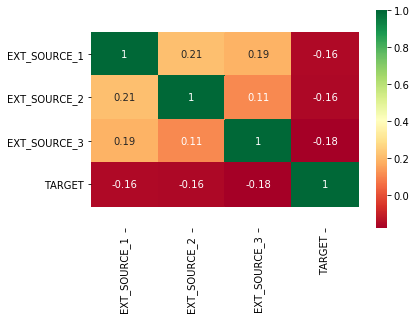

In [25]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = applicationDF[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5); 

<p>
    <font color = blue>
        <em>
As there is no correlation among EXT_SOURCE_X columns and targets, we can drop these columns
        </em>
    </font>
</p>  

In [26]:
# create a list of columns that needs to be dropped including the columns with >40% null values
Unwanted_application = nullcol_40_application["index"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 
# as EXT_SOURCE_1 column is already included in nullcol_40_application 
len(Unwanted_application)

51

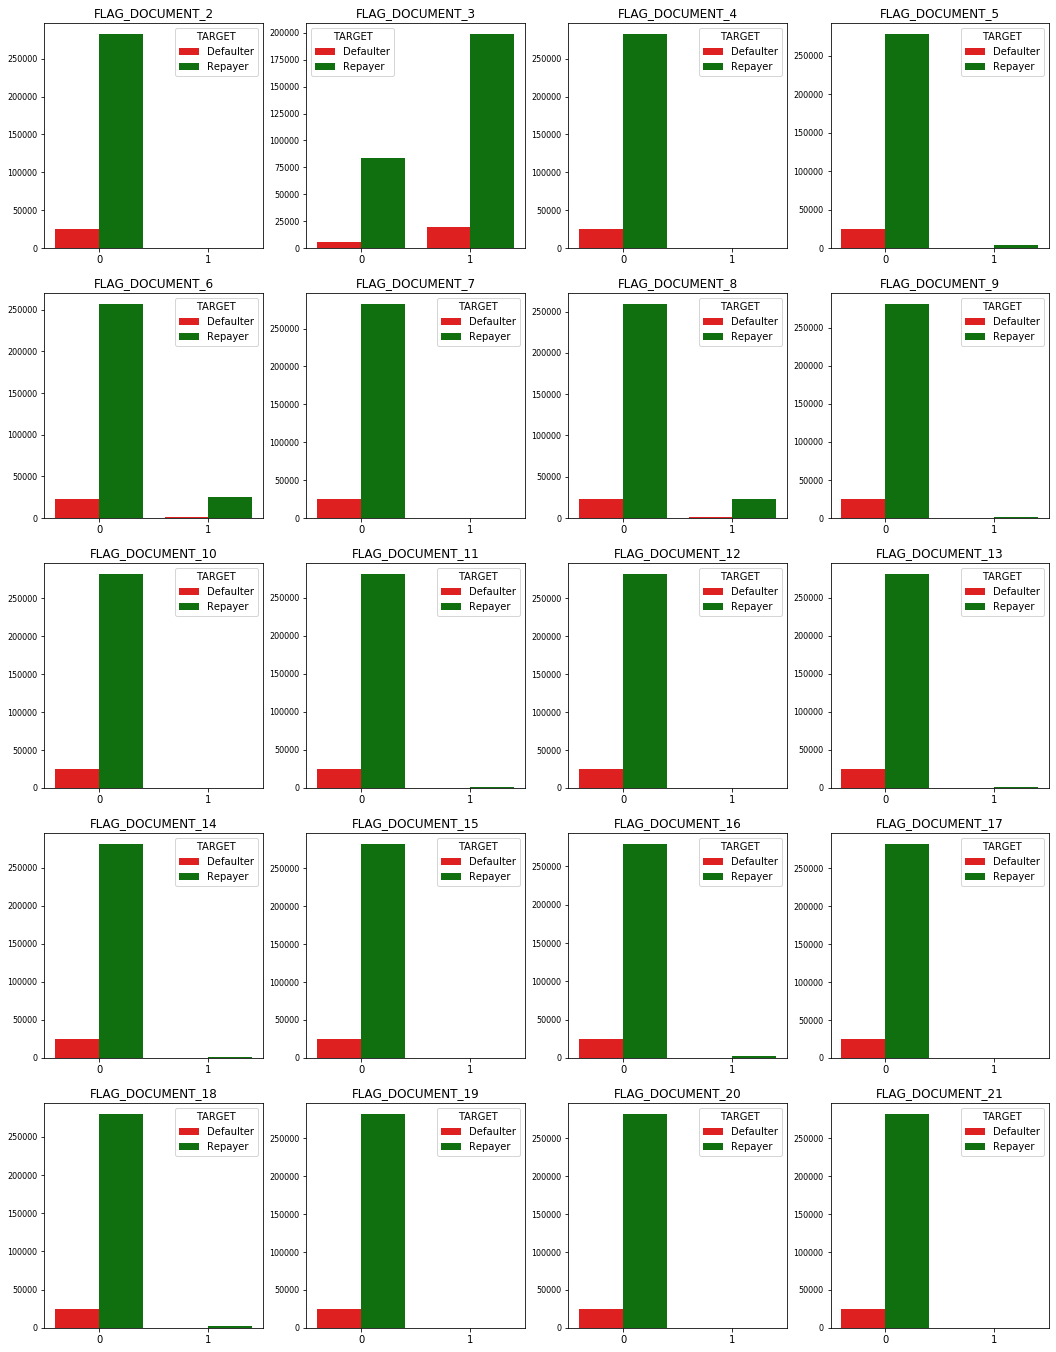

In [27]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = applicationDF[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(18,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

<p>
    <font color = blue>
        <em>
The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan
        </em>
    </font>
</p> 

In [28]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3') 
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

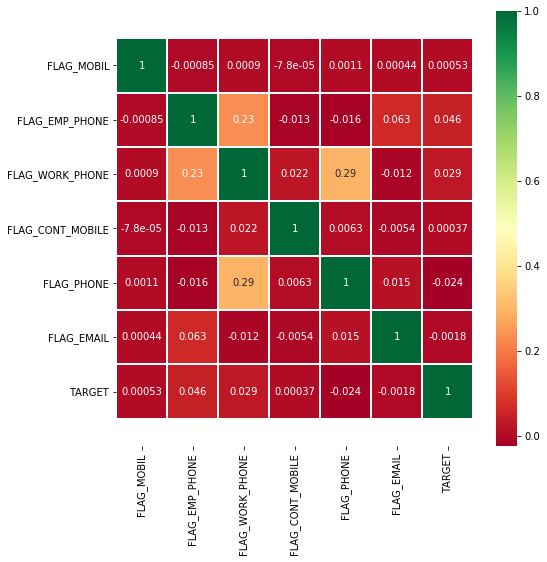

In [29]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = applicationDF[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

<p>
    <font color = blue>
        <em>
There is no correlation with flags of mobile phone, email etc with loan repayment; thus these columns can be deleted
        </em>
    </font>
</p> 

In [30]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET') 
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

<p>
    <font color = blue>
        <em><b>
Total 76 columns can be deleted from applicationDF
            </b>
        </em>
    </font>
</p>

In [33]:
# Dropping the unnecessary columns from applicationDF
applicationDF.drop(labels=Unwanted_application,axis=1,inplace=True)


In [37]:
# Inspecting the dataframe after removal of unnecessary columns
applicationDF.shape

(307511, 46)

In [43]:
# inspecting the column types after removal of unnecessary columns
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

<p>
    <font color = blue>
        <em>
After deleting unnecessary columns, there are 46 columns remaining in applicationDF
        </em>
    </font>
</p> 

#### 3.3.1 Analyze other unwanted columns in previousDF

In [184]:
# Getting the 11 columns which has more than 40% unknown
Unwanted_previous = nullcol_40_previous["index"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [185]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [186]:
Unwanted_previous = Unwanted_previous + Unnecessary_previous
len(Unwanted_previous)

15

<p>
    <font color = blue>
        <em><b>
Total 19 columns can be deleted from previousDF
            </em></b>
    </font>
</p>

In [187]:
# Dropping the unnecessary columns from previous
previousDF.drop(labels=Unwanted_previous,axis=1,inplace=True)

In [188]:
# Inspecting the dataframe after removal of unnecessary columns
previousDF.shape

(1670214, 22)

In [189]:
# inspecting the column types after after removal of unnecessary columns
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  object  
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

<p>
    <font color = blue>
        <em>
After deleting unnecessary columns, there are 22 columns remaining in applicationDF
        </em>
    </font>
</p> 

### 3.4 Null value data imputation

In [40]:
# checking the null value % of each column in applicationDF dataframe
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

In [45]:
applicationDF['AMT_GOODS_PRICE'].value_counts(normalize=True)

450000.0    0.084698
225000.0    0.082289
675000.0    0.081248
900000.0    0.050177
270000.0    0.037197
              ...   
705892.5    0.000003
442062.0    0.000003
353641.5    0.000003
353749.5    0.000003
738945.0    0.000003
Name: AMT_GOODS_PRICE, Length: 1002, dtype: float64

In [48]:
applicationDF['AMT_GOODS_PRICE'].isnull().sum()

278

In [ ]:
# can impute after merge? with previous amt_goods_price

In [56]:
applicationDF['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [107]:
applicationDF['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [108]:
applicationDF['NAME_TYPE_SUITE'].mode(0)

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: category
Categories (7, object): [Children, Family, Group of people, Other_A, Other_B, Spouse, partner, Unaccompanied]

In [115]:
applicationDF['NAME_TYPE_SUITE'].fillna((applicationDF['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

In [116]:
applicationDF['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

In [117]:
applicationDF['NAME_TYPE_SUITE'].isnull().sum()

0

In [71]:
applicationDF['OCCUPATION_TYPE'].isnull().sum()

96391

In [63]:
applicationDF['OCCUPATION_TYPE'].value_counts(normalize=True)                

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [73]:
# Null values are 31% and could be a implicit category by institution
# hence replace those values with a new category “Unknown”
applicationDF['OCCUPATION_TYPE'] = applicationDF['OCCUPATION_TYPE'].cat.add_categories('Unknown')
applicationDF['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

In [77]:
applicationDF['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [78]:
applicationDF['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)                

0.0      0.534797
1.0      0.159167
2.0      0.097256
3.0      0.066306
4.0      0.046145
5.0      0.031169
6.0      0.021055
7.0      0.014323
8.0      0.009681
9.0      0.006535
10.0     0.004490
11.0     0.002780
12.0     0.002127
13.0     0.001341
14.0     0.000842
15.0     0.000542
16.0     0.000434
17.0     0.000287
18.0     0.000150
19.0     0.000144
20.0     0.000098
21.0     0.000095
22.0     0.000072
23.0     0.000049
24.0     0.000036
25.0     0.000036
27.0     0.000016
26.0     0.000010
30.0     0.000007
28.0     0.000003
348.0    0.000003
29.0     0.000003
47.0     0.000003
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Imputing mode, mean or median values on these columns might influence the defaulter vs repayer decision and hence lets use -1 

In [81]:
applicationDF['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(-1,inplace = True)
applicationDF['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(-1,inplace = True)
applicationDF['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(-1,inplace = True)
applicationDF['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(-1,inplace = True)

In [83]:
applicationDF['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [84]:
applicationDF['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)                

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [88]:
applicationDF['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()             

0.006402448193930645

In [87]:
applicationDF['AMT_REQ_CREDIT_BUREAU_HOUR'].median()              

0.0

In [95]:
applicationDF['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)                

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [97]:
applicationDF['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)                

0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
6.0    0.000075
5.0    0.000038
8.0    0.000019
7.0    0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [98]:
applicationDF['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)                

0.0     0.835488
1.0     0.124617
2.0     0.020249
3.0     0.007485
4.0     0.004045
5.0     0.002263
6.0     0.001290
7.0     0.001120
9.0     0.000774
8.0     0.000696
10.0    0.000496
11.0    0.000447
12.0    0.000289
13.0    0.000271
14.0    0.000150
15.0    0.000132
16.0    0.000086
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
27.0    0.000004
22.0    0.000004
23.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [99]:
applicationDF['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)                

0.0      0.809863
1.0      0.127305
2.0      0.054182
3.0      0.006455
4.0      0.001790
5.0      0.000241
6.0      0.000105
7.0      0.000026
8.0      0.000026
19.0     0.000004
261.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [100]:
applicationDF['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)                

0.0     0.269937
1.0     0.238372
2.0     0.188697
3.0     0.126425
4.0     0.077875
5.0     0.045310
6.0     0.026193
7.0     0.014546
8.0     0.007996
9.0     0.004120
11.0    0.000117
12.0    0.000113
10.0    0.000083
13.0    0.000071
14.0    0.000038
17.0    0.000026
15.0    0.000023
19.0    0.000015
18.0    0.000015
16.0    0.000011
21.0    0.000004
23.0    0.000004
25.0    0.000004
20.0    0.000004
22.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [101]:
applicationDF['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

1.899974435321363

In [102]:
applicationDF['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

1.0

In [103]:
# Impute with median as mean has decimals and this is number of people.
applicationDF['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace = True)
applicationDF['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace = True)
applicationDF['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace = True)
applicationDF['AMT_REQ_CREDIT_BUREAU_MON'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace = True)
applicationDF['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace = True)
applicationDF['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace = True)

In [118]:
# checking the null value % of each column in previousDF dataframe
round(applicationDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.02
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

#### impute on previous DF

In [190]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY                0.00
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE            0.00
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
dtype: float64

In [178]:
previousDF['AMT_ANNUITY'].value_counts(normalize=True)                

2250.000     2.454970e-02
11250.000    1.076597e-02
6750.000     1.035610e-02
9000.000     9.627274e-03
22500.000    9.170410e-03
                 ...     
30073.860    7.704285e-07
41845.365    7.704285e-07
36622.620    7.704285e-07
41864.760    7.704285e-07
63715.905    7.704285e-07
Name: AMT_ANNUITY, Length: 357959, dtype: float64

In [137]:
previousDF['AMT_ANNUITY'].isnull().sum()

372235

In [138]:
previousDF[previousDF['AMT_ANNUITY'].isnull()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
6           2315218      175704         Cash loans          NaN              0.0         0.0              NaN                    XNA             Canceled            -14                    XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                      Cash
7           1656711      296299         Cash loans          NaN              0.0         0.0              NaN                    XNA             Canceled            -21                    XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                      Cash
8           2367563      342292         Cash loans          NaN              0.0         0.0              NaN                    XNA             Canceled           -386                    XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                      Cash
9           2579447      334349         Cash loans          NaN              0.0         0.0              NaN                    XNA             Canceled            -57                    XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                      Cash
22          1172842      302212         Cash loans          NaN              0.0         0.0              NaN                    XNA              Refused           -239                    XNA                 HC         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                      Cash
...             ...         ...                ...          ...              ...         ...              ...                    ...                  ...            ...                    ...                ...              ...                 ...            ...               ...                      ...               ...                  ...          ...              ...                       ...
1670187     1971628      435554         Cash loans          NaN              0.0         0.0              NaN                    XNA             Canceled           -134                    XNA                XAP         Repeater                 XNA            XNA               XNA           Contact center                -1                  XNA          NaN              XNA                      Cash
1670190     2381880      175920         Cash loans          NaN              0.0         0.0              NaN                    XNA             Canceled           -243                    XNA                XAP         Repeater                 XNA            XNA               XNA           Contact center                -1                  XNA          NaN              XNA                      Cash
1670193     1120445      179433    Revolving loans          NaN              0.0         0.0              NaN                    XAP              Refused           -365                    XNA                 HC        Refreshed                 XNA            XNA               XNA          AP+ (Cash loan)                10                  XNA          NaN              XNA               Card Street

In [191]:
previousDF['AMT_ANNUITY'].fillna(0,inplace = True)

In [141]:
previousDF['AMT_GOODS_PRICE'].isnull().sum()

385515

In [142]:
previousDF[previousDF['AMT_GOODS_PRICE'].isnull()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION
6           2315218      175704         Cash loans          0.0              0.0         0.0              NaN                    XNA             Canceled            -14               XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                Cash
7           1656711      296299         Cash loans          0.0              0.0         0.0              NaN                    XNA             Canceled            -21               XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                Cash
8           2367563      342292         Cash loans          0.0              0.0         0.0              NaN                    XNA             Canceled           -386               XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                Cash
9           2579447      334349         Cash loans          0.0              0.0         0.0              NaN                    XNA             Canceled            -57               XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                Cash
22          1172842      302212         Cash loans          0.0              0.0         0.0              NaN                    XNA              Refused           -239               XNA                 HC         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                Cash
...             ...         ...                ...          ...              ...         ...              ...                    ...                  ...            ...               ...                ...              ...                 ...            ...               ...                      ...               ...                  ...          ...              ...                 ...
1670186     1433968      272570         Cash loans          0.0              0.0         0.0              NaN                    XNA             Canceled            -21               XNA                XAP         Repeater                 XNA            XNA               XNA           Contact center                -1                  XNA          NaN              XNA                Cash
1670187     1971628      435554         Cash loans          0.0              0.0         0.0              NaN                    XNA             Canceled           -134               XNA                XAP         Repeater                 XNA            XNA               XNA           Contact center                -1                  XNA          NaN              XNA                Cash
1670190     2381880      175920         Cash loans          0.0              0.0         0.0              NaN                    XNA             Canceled           -243               XNA                XAP         Repeater                 XNA            XNA               XNA           Contact center                -1                  XNA          NaN              XNA                Cash
1670192     2101747      339383    Revolving loans       3375.0              0.0     67500.0              NaN

In [192]:
previousDF['AMT_GOODS_PRICE'].fillna(0,inplace = True)

In [146]:
#  number of payments for the credit.
previousDF['CNT_PAYMENT'].value_counts(normalize=True)                

12.0    2.488852e-01
6.0     1.467360e-01
0.0     1.117001e-01
10.0    1.092856e-01
24.0    1.061369e-01
18.0    5.965405e-02
36.0    5.591980e-02
60.0    4.129481e-02
48.0    3.645345e-02
8.0     2.338164e-02
4.0     2.074294e-02
30.0    1.303868e-02
14.0    6.358322e-03
42.0    5.497757e-03
16.0    4.399130e-03
5.0     3.048574e-03
54.0    1.620975e-03
20.0    1.390618e-03
7.0     1.104790e-03
9.0     9.522459e-04
3.0     8.474681e-04
15.0    6.964647e-04
11.0    5.154147e-04
72.0    1.070891e-04
13.0    3.929170e-05
17.0    3.698043e-05
84.0    3.466915e-05
22.0    2.850574e-05
23.0    2.080149e-05
26.0    1.001553e-05
35.0    8.474681e-06
66.0    7.704255e-06
29.0    6.163404e-06
28.0    6.163404e-06
32.0    4.622553e-06
19.0    4.622553e-06
34.0    3.081702e-06
59.0    3.081702e-06
45.0    2.311277e-06
41.0    2.311277e-06
47.0    2.311277e-06
21.0    2.311277e-06
44.0    1.540851e-06
39.0    1.540851e-06
38.0    1.540851e-06
46.0    1.540851e-06
40.0    7.704255e-07
33.0    7.704

In [147]:
previousDF['CNT_PAYMENT'].isnull().sum()

372230

In [148]:
previousDF[previousDF['CNT_PAYMENT'].isnull()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
6           2315218      175704         Cash loans          0.0              0.0         0.0              0.0                    XNA             Canceled            -14                    XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                      Cash
7           1656711      296299         Cash loans          0.0              0.0         0.0              0.0                    XNA             Canceled            -21                    XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                      Cash
8           2367563      342292         Cash loans          0.0              0.0         0.0              0.0                    XNA             Canceled           -386                    XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                      Cash
9           2579447      334349         Cash loans          0.0              0.0         0.0              0.0                    XNA             Canceled            -57                    XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                      Cash
22          1172842      302212         Cash loans          0.0              0.0         0.0              0.0                    XNA              Refused           -239                    XNA                 HC         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                  XNA          NaN              XNA                      Cash
...             ...         ...                ...          ...              ...         ...              ...                    ...                  ...            ...                    ...                ...              ...                 ...            ...               ...                      ...               ...                  ...          ...              ...                       ...
1670187     1971628      435554         Cash loans          0.0              0.0         0.0              0.0                    XNA             Canceled           -134                    XNA                XAP         Repeater                 XNA            XNA               XNA           Contact center                -1                  XNA          NaN              XNA                      Cash
1670190     2381880      175920         Cash loans          0.0              0.0         0.0              0.0                    XNA             Canceled           -243                    XNA                XAP         Repeater                 XNA            XNA               XNA           Contact center                -1                  XNA          NaN              XNA                      Cash
1670193     1120445      179433    Revolving loans          0.0              0.0         0.0              0.0                    XAP              Refused           -365                    XNA                 HC        Refreshed                 XNA            XNA               XNA          AP+ (Cash loan)                10                  XNA          NaN              XNA               Card Street

In [151]:
previousDF.loc[previousDF['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [193]:
previousDF['CNT_PAYMENT'].fillna(0,inplace = True)

In [166]:
#  number of payments for the credit.
previousDF['PRODUCT_COMBINATION'].value_counts(normalize=True)                

Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64

In [155]:
previousDF['PRODUCT_COMBINATION'].isnull().sum()

346

In [164]:
previousDF.loc[previousDF['PRODUCT_COMBINATION'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled    315
Refused      31
Name: NAME_CONTRACT_STATUS, dtype: int64

In [194]:
# Null values are 2% and all are either cancelled or refused
# TODO: check if this is ok or should we impute with highest frequency combination i.e Cash
# hence replace those values with a new category “Unknown”
previousDF['PRODUCT_COMBINATION'] = previousDF['PRODUCT_COMBINATION'].cat.add_categories('Unknown')
previousDF['PRODUCT_COMBINATION'].fillna('Unknown', inplace =True) 

In [195]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                0.0
SK_ID_CURR                0.0
NAME_CONTRACT_TYPE        0.0
AMT_ANNUITY               0.0
AMT_APPLICATION           0.0
AMT_CREDIT                0.0
AMT_GOODS_PRICE           0.0
NAME_CASH_LOAN_PURPOSE    0.0
NAME_CONTRACT_STATUS      0.0
DAYS_DECISION             0.0
NAME_PAYMENT_TYPE         0.0
CODE_REJECT_REASON        0.0
NAME_CLIENT_TYPE          0.0
NAME_GOODS_CATEGORY       0.0
NAME_PORTFOLIO            0.0
NAME_PRODUCT_TYPE         0.0
CHANNEL_TYPE              0.0
SELLERPLACE_AREA          0.0
NAME_SELLER_INDUSTRY      0.0
CNT_PAYMENT               0.0
NAME_YIELD_GROUP          0.0
PRODUCT_COMBINATION       0.0
dtype: float64

### 3.5 Rows Deletion with high number of parameters missing

<h2>
    <font color = green>
        4. Merging of Dataframes
    </font>
</h2> 


In [119]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(applicationDF, previousDF, on='SK_ID_CURR')
loan_process_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
0      100002       1           Cash loans           M             0                1             0          202500.0      406597.5        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved           -606                    XNA                XAP              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest
1      100003       0           Cash loans           F             0                0             0          270000.0     1293502.5        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0     1810518           Cash loans      98356.995         900000.0     1035882.0           900000.0                    XNA             Approved           -746                    XNA                XAP         Repeater                   XNA      

In [122]:
applicationDF['AMT_GOODS_PRICE'].isnull().sum()

278

In [123]:
loan_process_df['AMT_GOODS_PRICE_x'].isnull().sum()

1208

In [124]:
len(applicationDF.index)

307511

In [125]:
len(loan_process_df.index)

1413701

In [130]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y']
loan_process_df.loc[(~loan_process_df['AMT_GOODS_PRICE_y'].isnull() & loan_process_df['AMT_GOODS_PRICE_x'].isnull()),cols]

AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y
3417              45000.0      135000.0         6750.0                NaN       9169.290          67090.5       68787.0            67090.5
3418              45000.0      135000.0         6750.0                NaN      11094.750         210204.0      246276.0           210204.0
3419              45000.0      135000.0         6750.0                NaN       1923.840          35257.5       42705.0            35257.5
27447            157500.0      450000.0        22500.0                NaN      12185.775         106357.5      117589.5           106357.5
27448            157500.0      450000.0        22500.0                NaN       6750.000         135000.0      135000.0           135000.0
...                   ...           ...            ...                ...            ...              ...           ...                ...
1407131          135000.0      270000.0        13500.0                NaN      25729.605         103455.0       95256.0           103455.0
1407841           67500.0      202500.0        10125.0                NaN      16254.225         137749.5      147190.5           137749.5
1407842           67500.0      202500.0        10125.0                NaN      15358.500          82494.0       86575.5            82494.0
1407843           67500.0      202500.0        10125.0                NaN       8235.360          81805.5       89905.5            81805.5
1407844           67500.0      202500.0        10125.0                NaN       7752.465          74601.0       65587.5            74601.0

[958 rows x 8 columns]

In [132]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y']
loan_process_df.loc[(loan_process_df['AMT_GOODS_PRICE_x'].isnull()),cols]

AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y
3417              45000.0      135000.0         6750.0                NaN       9169.290          67090.5       68787.0            67090.5
3418              45000.0      135000.0         6750.0                NaN      11094.750         210204.0      246276.0           210204.0
3419              45000.0      135000.0         6750.0                NaN       1923.840          35257.5       42705.0            35257.5
27447            157500.0      450000.0        22500.0                NaN      12185.775         106357.5      117589.5           106357.5
27448            157500.0      450000.0        22500.0                NaN       6750.000         135000.0      135000.0           135000.0
...                   ...           ...            ...                ...            ...              ...           ...                ...
1407132          135000.0      270000.0        13500.0                NaN            NaN              0.0           0.0                NaN
1407841           67500.0      202500.0        10125.0                NaN      16254.225         137749.5      147190.5           137749.5
1407842           67500.0      202500.0        10125.0                NaN      15358.500          82494.0       86575.5            82494.0
1407843           67500.0      202500.0        10125.0                NaN       8235.360          81805.5       89905.5            81805.5
1407844           67500.0      202500.0        10125.0                NaN       7752.465          74601.0       65587.5            74601.0

[1208 rows x 8 columns]

<h2>
    <font color = green>
         5. Data Analysis
    </font>
</h2>

### 5.1 Univariate Analysis

### 5.2 Bivariate / Multivariate Analysis

<h2>
    <font color = green>
        6. Conclusion
    </font>
</h2>  